# Regression

Regression methods can be used to predict a continuous value (target) using some other variables (features). In regression, there are two types of variables, a dependent variable (target, typically denoted by Y) and one or more independent variables (features, typically denoted by X). Our regression models relates Y as a function of X. The key point in the regression is that our dependent variable Y should be continuous and can not be a discrete value. However, the independent variables can be measured on categorial or continous measurement scales.

Basically, there are two types of regression models :
<ul>
<li>Simple Regression :: When only one independent variable is used to estimate the dependent variable. It can be either linear or non-linear regression, depending on the relationship between the independent and dependent variable.</li>
    
<li>Multiple Regression :: When more than one independent variables are used in modelling. Again, this regression can be linear or non-linear.</li>
</ul>

We have many regression algorithms, each of them has their own importance and specific conditions to which their application is best suited.
<ul>
<li> Ordinal regression </li>
<li> Poisson regression </li>
<li> Fast forest quantile regression </li>
<li> Linear, Polynomial, Lasso, Stepwise, Ridge regression </li>
<li> Bayesian Linear Regression </li>
<li> Neural network regression </li>
<li> Decision forest regression </li>
<li> Boosted decision tree regression </li>
<li> KNN (K-nearest neighbors) </li>
</ul>

# Linear Regression

Linear regression is the approximation of a linear model used to describe the relationship between two or more variables. Linear Regression fits a linear model $\hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+...$ with coefficients (also called parameters) $\theta = (\theta_0,\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares. Here $x_i$'s are independent feature variables and $\hat{y}$ is the prediction made by model given a certain values of $x_i$'s.

The mean of all residual errors ($y-\hat{y}$) is a measure of how the model fits with the dataset:

\begin{equation*}
MSE = \frac{1}{n}\sum_{i}^{n}(y_i - \hat{y}_i)^2
\end{equation*}

where $y_i$, $\hat{y}_i$ are the actual and predicted values respectively, and $n$ is the number of sample data points. Our objective is to find the parameters values $\theta_i$'s such that MSE is minimized. 

We have two options to determine these error minimizing $\theta_i$'s: 
<ui>
<li> Mathematical approach : for a simple linear regressin with only one independent variable
    \begin{equation*}
    \theta_1 = \frac{\sum_i^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_i^n(x_i-\bar{x})^2}; \theta_0 = \bar{y} - \theta_1\bar{x}
    \end{equation*}
    where $\bar{x}, \bar{y}$ represent mean values of $x_i$'s and $y_i$'s respectively.

</li>
<li> Optimization approach : gradient descent (this approach is efficient for very large dataset, as the mathematical approach deals with large matrices and becomes inefficient)</li>
</ui>

# Model Evaluation

The goal of regression is to build a model to accurately predict an unseen case. To this end, we have to perform evaluation of our model. When considering evalution of models, we clearly want to choose the one that gives the most accurate result. Thus, the question is how we can estimate the accuracy of our models. In other words, how much we can trust this model in prediction of an unknown sample using the given dataset and the model we have built.

One of the solution is train-test split, in which we split the dataset into mutually exclusive training and test dataset. We use the training set for building the model. Now we can use the model to make prediction on the test set and see how the predicted values on the test set compare with the actual values of the test set. This indicates how accurate our model is. Once, we have selected the model with best accuracy, we train our model on the whole dataset, as we do not want to lose any valueable data for training.

The issue with train-test is that it is highly dependent on the dataset on which the data was trained and tested. This can be resolved by using another evaluation model called K-fold cross validation. In K-fold cross validation, we split the whole data into K number of folds. We use K-1 folds for training and building the model and the remaining one is used for testing and evaluating the model. We continue this process until each fold is used for testing the model, finally averaging the correctness evalution of all the folds.

Now, we know that we have to compare the actual values and predicted values to estimate the accuracy of a regression model. For this purpose, we need accuracy metrics to quantify the accuracy of models. Evaluation metrics are used to explain the performance of a model. Some model evalution metrics that are used for regression are:
<ul>
    <li> Mean absolute error(MAE): It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
        \begin{equation*}
        MAE = \frac{1}{n}\sum_{i=1}^n|y_i - \hat{y}_i|
        \end{equation*}
    </li>
    <li>Mean Squared Error (MSE): Mean sqaured error is the mean of the squared error. 
        \begin{equation*}
        MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2
        \end{equation*}
        It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    </li>
    <li>Root Mean Squared Error (RMSE): This is the square root of the Mean Squared Error.
        \begin{equation*}
        RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}
        \end{equation*}
        This is one of the most popular of the evaluation metrics because RMSE is in the same units as the target variable, making it easy to interpret.
    </li>
    <li>Relative Absolute Error (RAE):
        \begin{equation*}
        RAE = \frac{\sum_{i=1}^n|y_i - \hat{y}_i|}{\sum_{i=1}^n|y_i - \bar{y}|}
        \end{equation*}
    </li>
    <li>Relative Squared Error (RSE):
        \begin{equation*}
        RSE = \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}
        \end{equation*}
        R-squared = 1-RSE, is not an error but is a popular metric for estimating the accuracy of model. It represents how close the data values are to the fitted regression line. The higher the R-squared, the better the model fits the data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
    </li>
</ul>

# Simple Linear Regression

In simple linear regression, there are two variables, a dependent variable and an independent variable

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

This fuel consumption dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicals

In [2]:
df = pd.read_csv('fuel_consumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()                        # to get basic statistics about the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features for futher exploration

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

We can plot each of these features

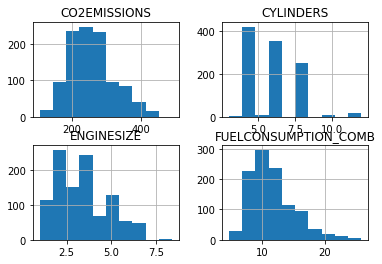

In [6]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

Now, let's plot these features vs the Emission to see how linear is their relation:

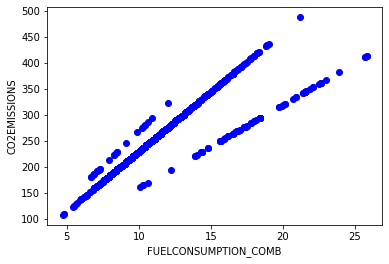

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

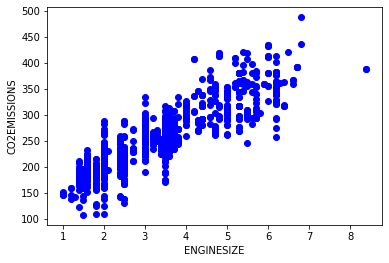

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

Lets split our dataset into train and test sets, 80% of the entire data for training, and the rest 20% for testing. We create a mask to select random rows:

In [9]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Let's use scikit-learn to model engine-size vs Co2 emissions

In [10]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
lr.fit(train_x, train_y)
print(lr.intercept_, lr.coef_)

[125.84917006] [[38.82506824]]


Let's plot the data alongwith the fitted line

Text(0, 0.5, 'CO2EMISSIONS')

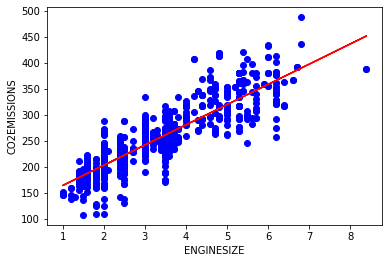

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [12]:
from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_yhat = lr.predict(test_x)

print('mean absolute error : %.2f' % np.mean(np.absolute(test_yhat - test_y)))
print('residual sum of squares (MSE) : %.2f' % np.mean((test_yhat - test_y)**2))
print('R2-score : %.2f' % r2_score(test_yhat, test_y))

mean absolute error : 22.96
residual sum of squares (MSE) : 898.13
R2-score : 0.72
